# Unsupervised Machine Learning Algorithms Final Project
## Customer Segmentation using Clustering and PCA
The purpose of this project is to perform unsupervised clustering of customers' data for customer segmentation. The customers are divided into distinct groups or clusters based on their shared characteristics so that the company can better facilitate targeted campaigns. 

The data set customer-personality-analysis contains various information about customer demographics and past purchases. We will use PCA for dimentionality reduction, K-Means and Agglomerative Clustering for modeling.

### Data Source
Data source citation:
Patel, A. (2021, August 22). Customer personality analysis. Kaggle. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data 

The features in the data are described as follows:
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise
11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years
17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month
28. Z_CostContact: same for all rows
29. Z_Revenue: same for all rows

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from warnings import filterwarnings
filterwarnings(action='ignore')

## Exploratory Data Analysis
We will start by loading in the data and checking the data size.

In [3]:
# load data and check shape
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.shape

(2240, 29)

**Data size:** data has 2240 rows and 29 columns

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning
When we check the info of the data we can see that 24 values in the Income column are missing, there are no other non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We will drop the NA values since there are only 24 of them:

In [6]:
df = df.dropna()
df.shape

(2216, 29)

Let's check the unique values of feature "Education":

In [7]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

The unique values for Education are 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'. Based on information online, 2n Cycle corresponds to master's degree in some european countries but it is not clear if Graduation and Basic correspond to Undergraduate degree, so we will leave the values as they are. 

In [8]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

For Marital_Status feature we can see that there are two invalid entries: Absurd and YOLO. We will drop these. 

In [9]:
df = df.drop(df[(df["Marital_Status"] == "YOLO") | (df["Marital_Status"] == "Absurd")].index)
# double check the unique values
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

Let's check the values of our data set:

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0,2212.0,2212.000000
mean,5587.731917,1968.811031,52232.510850,0.442586,0.505425,49.050633,305.030741,26.324593,166.970163,37.516275,...,5.320072,0.073689,0.074141,0.072785,0.063743,0.013562,0.009494,3.0,11.0,0.149638
std,3247.944128,11.982065,25187.455359,0.537052,0.544258,28.940794,337.611255,39.781794,224.344950,54.558673,...,2.423445,0.261323,0.262060,0.259842,0.244350,0.115691,0.096994,0.0,0.0,0.356797
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,23.750000,1.750000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.500000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


We can see as the minimum value for Year_Birth 1893. That must be a mistake, so we will filter out birth years less than 1930.

In [11]:
df = df[df['Year_Birth'] >= 1930]

We can also see an outlier for Income, maximum value of 666666, we will filter out Income higher than 600000

In [12]:
df = df[df['Income'] < 600000]

### Feature Engineering

The unique values for Marital_Status are Single, Together, Married, Divorced, Widow, Alone. However we only care if the customer has a partner at home or not, so we will create a new feature Partner_Status and code Married, Partner and Together as 1 and Widow, Divorced, Single and Alone as 0.

In [13]:
df["Partner_Status"]=df["Marital_Status"].replace({"Married": 1, "Partner": 1, "Together": 1, 
                                           "Widow": 0, "Divorced": 0, "Single": 0, "Alone": 0})


In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner_Status
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1


We will create new feature Total_Spent by adding up all the amounts the customer spent:

In [1]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

NameError: name 'df' is not defined

In [16]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Partner_Status,Total_Spent
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.0,2208.000000,2208.000000,2208.000000
mean,5584.532609,1968.904438,51943.520833,0.442482,0.505888,49.057518,305.226902,26.298007,167.004076,37.527174,...,0.074275,0.072464,0.063859,0.013587,0.009058,3.0,11.0,0.149909,0.646739,606.903986
std,3246.084196,11.697572,21536.756816,0.537112,0.544330,28.935531,337.606819,39.731780,224.316242,54.578404,...,0.262278,0.259313,0.244556,0.115795,0.094763,0.0,0.0,0.357063,0.478091,602.775960
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,1.750000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,69.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,174.000000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.500000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1047.250000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.000000,2525.000000


We will create feature "Age" by substracting Year_Birth from 2024. 

In [17]:
df['Age'] = 2024 - df['Year_Birth']

We will drop the features we are not going to use:

In [18]:
cols_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
df = df.drop(cols_drop, axis=1)

In [19]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Partner_Status,Total_Spent,Age
0,Graduation,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,1617,67
1,Graduation,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,0,0,27,70
2,Graduation,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,776,59
3,Graduation,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,53,40
4,PhD,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,422,43


### Data Visualizations
Let's chack the distributions for age, income and total spent.

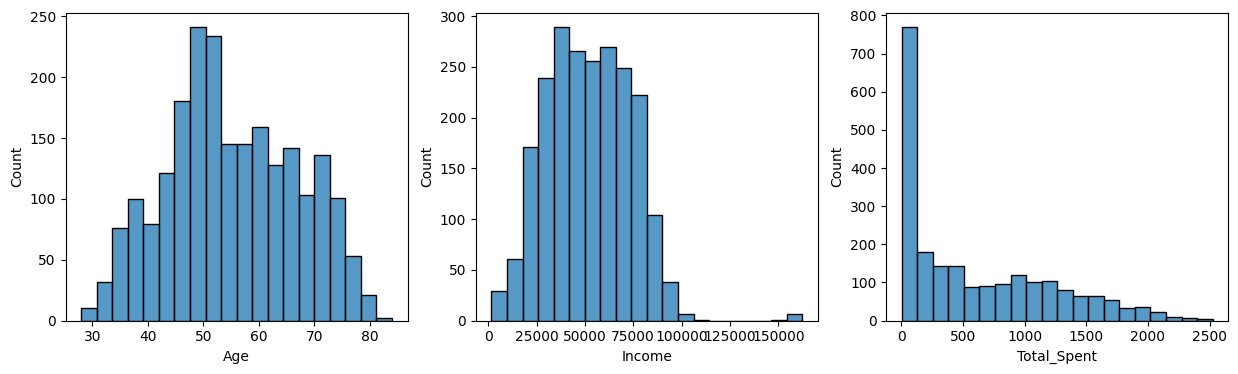

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten() 
sns.histplot(data=df, x="Age", bins=20, ax=axes[0])
sns.histplot(data=df, x="Income", bins=20, ax=axes[1])
sns.histplot(data=df, x="Total_Spent", bins=20, ax=axes[2])

plt.show()

We can see that Age is roughly normally distributed, there are still some outliers in the high income group and there is a high number of customers with very low total spending.

Next we will check demographic information of the customers, their education, partner status, how many kids they have at home and how many teenagers they have at home.

<Axes: xlabel='Teenhome', ylabel='count'>

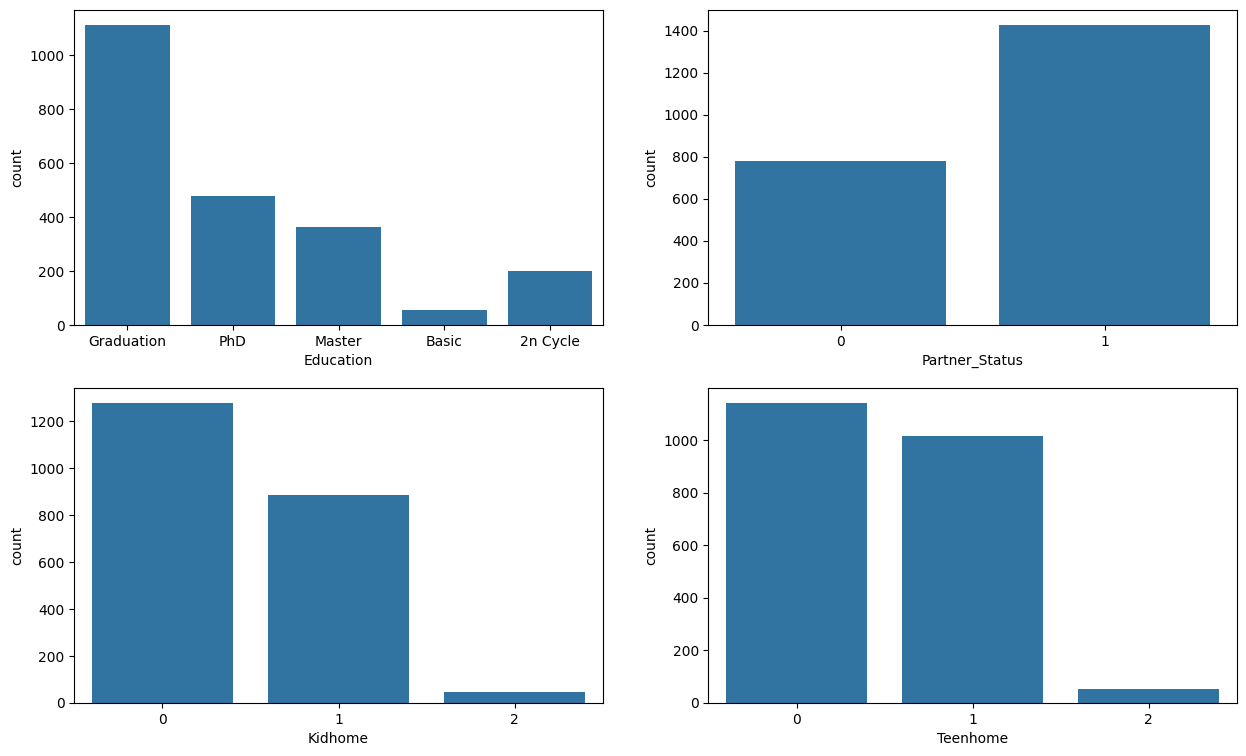

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
axes = axes.flatten() 

sns.countplot(data=df, x="Education", ax=axes[0])
sns.countplot(data=df, x="Partner_Status", ax=axes[1])
sns.countplot(data=df, x="Kidhome", ax=axes[2])
sns.countplot(data=df, x="Teenhome", ax=axes[3])


Graduation is the highest education category, most customers have a partner. Many customers do not have a kid or teenager at home, many have one kid or one teenager and very few have two.

### Correlation between features
Now we are going to check the correlation between features with a correlation matrix heat map. We can see that there is correlation between many features. 

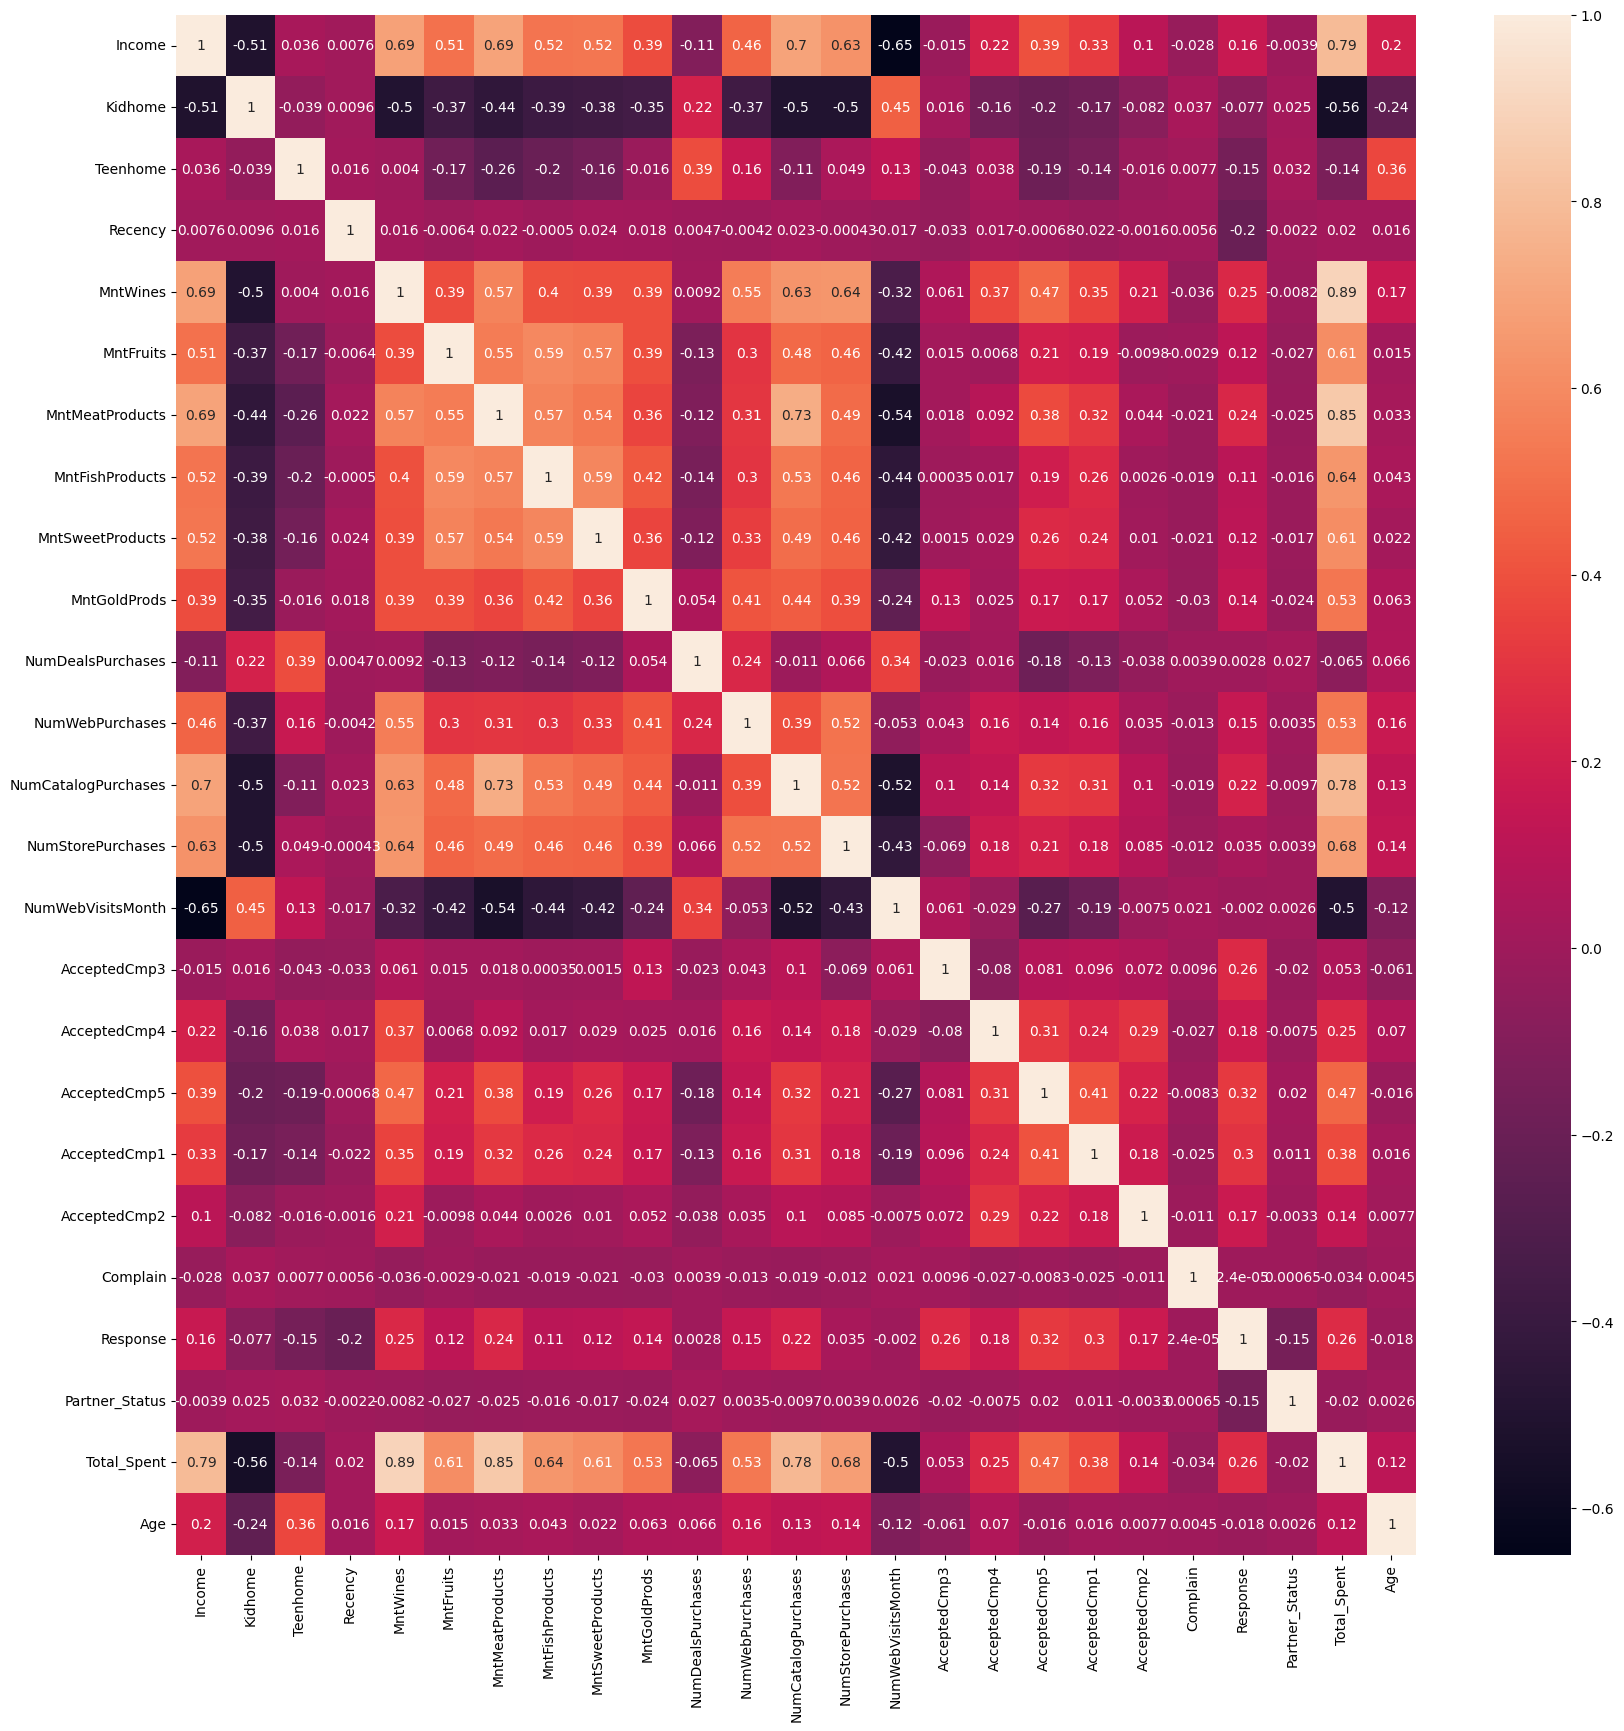

In [22]:
cor = df[df.columns[df.dtypes != 'object']].corr()

plt.figure(figsize=(20,20))  
sns.heatmap(cor, annot=True)
plt.savefig('corheat.png', dpi=300)

Let's check the relationship between income and total spent. We can see that there is a strong relationship.

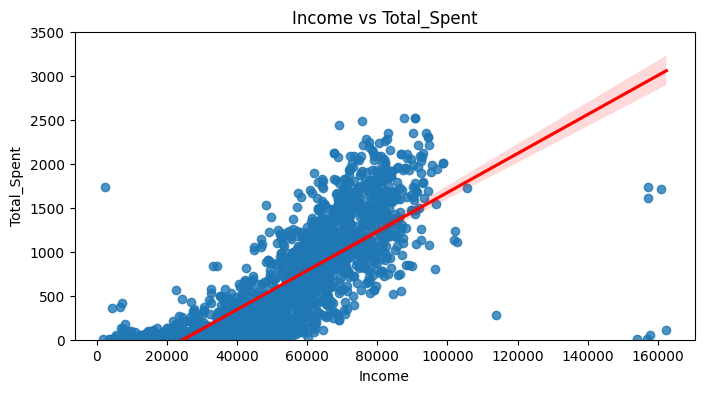

In [23]:
plt.figure(figsize=(8, 4))
sns.regplot(x='Income', y='Total_Spent', data=df, line_kws={'color': 'red'})

plt.title('Income vs Total_Spent')
axes = plt.gca()
axes.set_ylim(0, 3500)
plt.xlabel('Income')
plt.ylabel('Total_Spent')
plt.show()

### Data Transformations and Scaling


To prepare for modeling, we will start with label encoding the Education feature.

In [24]:
label_encoder = LabelEncoder()
df["Education"] = label_encoder.fit_transform(df["Education"])
df.info()                                             

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   int64  
 1   Income               2208 non-null   float64
 2   Kidhome              2208 non-null   int64  
 3   Teenhome             2208 non-null   int64  
 4   Recency              2208 non-null   int64  
 5   MntWines             2208 non-null   int64  
 6   MntFruits            2208 non-null   int64  
 7   MntMeatProducts      2208 non-null   int64  
 8   MntFishProducts      2208 non-null   int64  
 9   MntSweetProducts     2208 non-null   int64  
 10  MntGoldProds         2208 non-null   int64  
 11  NumDealsPurchases    2208 non-null   int64  
 12  NumWebPurchases      2208 non-null   int64  
 13  NumCatalogPurchases  2208 non-null   int64  
 14  NumStorePurchases    2208 non-null   int64  
 15  NumWebVisitsMonth    2208 non-null   int64 

In [25]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Partner_Status,Total_Spent,Age
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,1617,67
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,0,0,27,70
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,776,59
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,53,40
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,422,43


Now we will scale our data using StandardScaler. 

In [26]:
standard_scaler = StandardScaler()
standard_scaler.fit(df)
scaled_df = pd.DataFrame(standard_scaler.transform(df),columns= df.columns )
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Partner_Status,Total_Spent,Age
0,-0.351204,0.287689,-0.824004,-0.929587,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,...,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,2.381322,-1.353059,1.676120,1.017915
1,-0.351204,-0.260057,1.038228,0.907950,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,...,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,-1.353059,-0.962274,1.274437
2,-0.351204,0.913505,-0.824004,-0.929587,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,...,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,0.739066,0.280592,0.333858
3,-0.351204,-1.174887,1.038228,-0.929587,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,...,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,0.739066,-0.919130,-1.290779
4,1.431460,0.294887,1.038228,-0.929587,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,...,-0.282324,-0.283258,-0.279508,-0.26118,-0.117363,-0.095607,-0.419935,0.739066,-0.306824,-1.034258


### Dimensionality Reduction with PCA
There is a very high number of features in our data set and as we have seen in the correlation matrix, many of our features are correlated.So we will perform dimensionality reduction using Principal Component Analysis (PCA): 

In [27]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2208.0,-5.470664e-17,2.763005,-5.180340,-2.512608,-0.740465,2.261240,8.329390
col2,2208.0,-1.287215e-17,1.451419,-3.734651,-1.176321,-0.137290,1.048841,4.903570
col3,2208.0,2.413528e-18,1.390982,-3.279190,-0.727570,-0.140018,0.369271,8.827492


Let's visualize our data in the reduced dimensions:

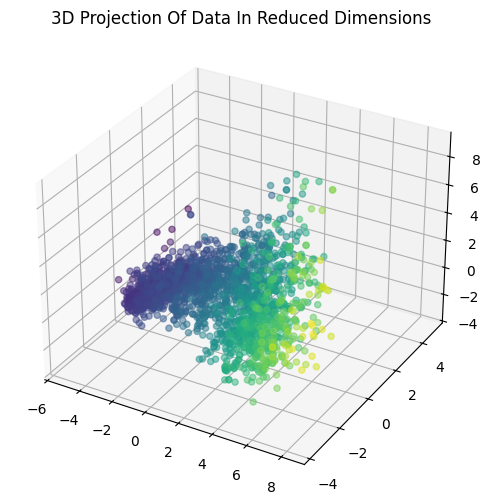

In [28]:
# reduce dimensions to 3
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=x, marker="o", alpha = 0.5 )
ax.set_title("3D Projection Of Data In Reduced Dimensions")
plt.show()

## Modeling
Now we are ready for modeling. We will use two clustering techniques: K-Means and Agglomerative.

### Clustering with K-Means

We will use Elbow Method to determine the number of clusters:

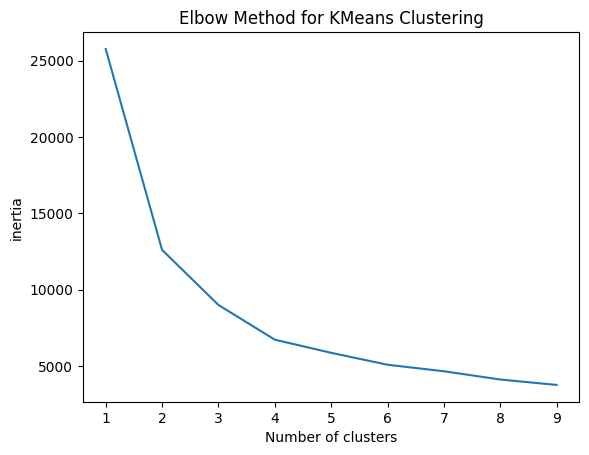

In [29]:
intertia = []

for ncluster in range(1,10):
    kmeans = KMeans(n_clusters = ncluster, init ='k-means++', random_state = 42)
    kmeans.fit(PCA_df)
    intertia.append(kmeans.inertia_)

plt.plot(range(1,10), intertia)
plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

We can see an elbow at 4 clusters, so will use 4 clusters in our K-Means model.

In [30]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(PCA_df)
df['cluster_kmeans'] = y_kmeans

Let's visualize our K-Means clusters:

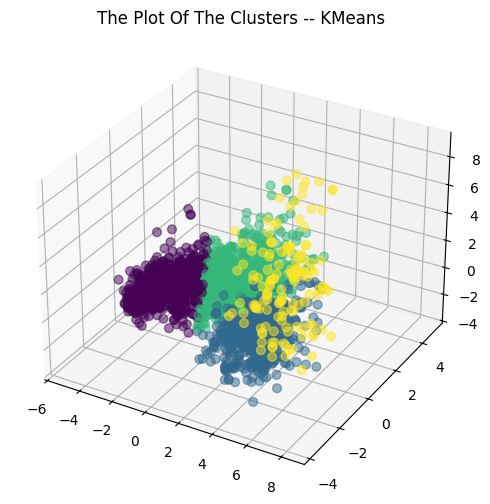

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=y_kmeans, marker='o', alpha = 0.5)
ax.set_title("The Plot Of The Clusters -- KMeans")
plt.show()

### Agglomerative Clustering
Now we will try agglomeartive clusters. First, let's look at a dendogram of our data. 

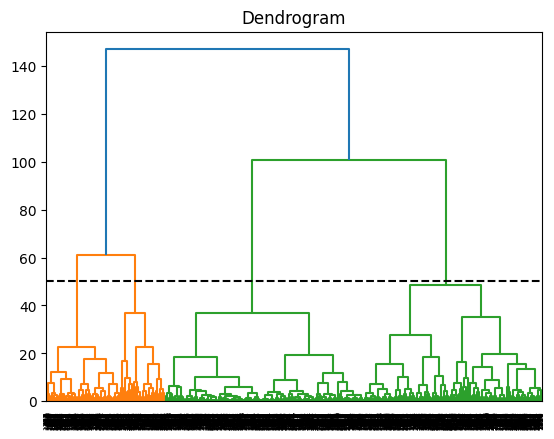

In [32]:
dendrogram(linkage(PCA_df, method = 'ward'))
plt.title('Dendrogram')
plt.axhline(y = 50, c= 'k', linestyle = '--')
plt.show()

We are ready for our Agglomerative Clustering method with 4 clusters:


In [33]:
ac_model = AgglomerativeClustering(n_clusters = 4,  metric = 'euclidean', linkage = 'ward')
y_ac = ac_model.fit_predict(PCA_df)
df['cluster_ac'] = y_ac

Let's visualize our Agglomerative Clusters:

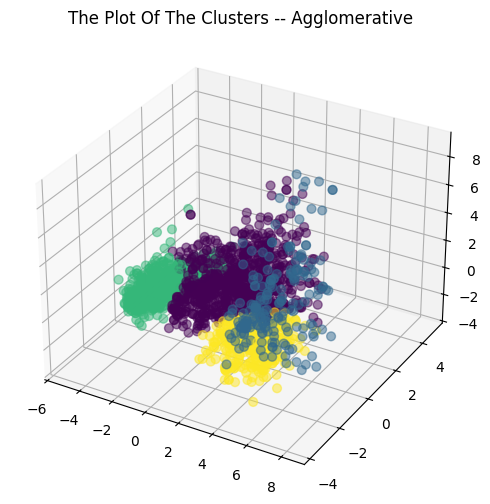

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=y_ac, marker='o', alpha = 0.5)
ax.set_title("The Plot Of The Clusters -- Agglomerative")
plt.show()

## Model Comparisons
Let's compare the two approaches with some visualizations.

First we will look at Income vs Total Spent scatter plots side by side. Although there are some similarities, we can see for example cluster 0 in agglomerative clustering is taking up more space. 

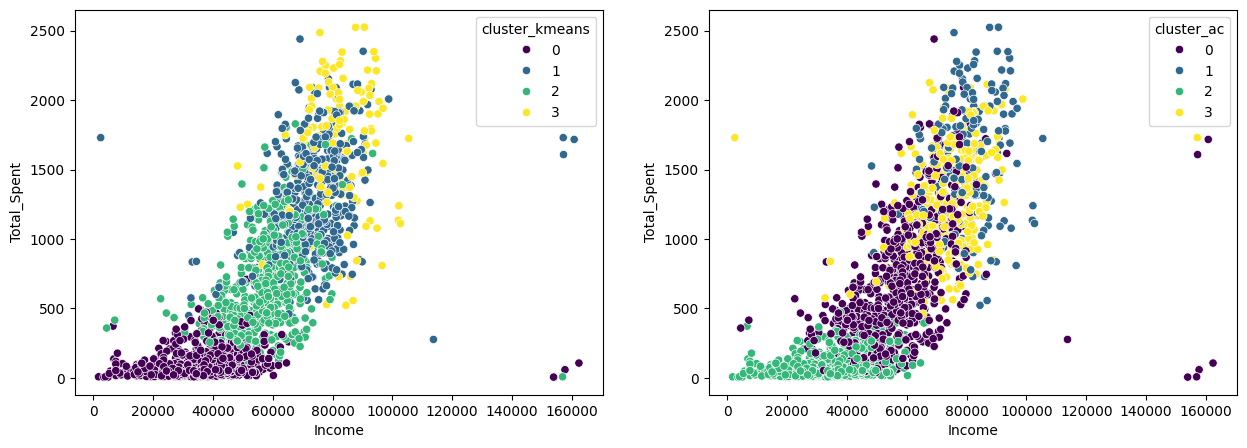

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='cluster_kmeans', palette='viridis', ax=ax[0])
sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='cluster_ac', palette='viridis', ax=ax[1])
plt.show()


Next we will compare boxplots of Income for each of K-means and Agglomerative clusters. Income boxplots for both K-Means and Agglomerative Clusters look similar with clusters 0 and 2 switching ranks. Total spent boxplot for cluster 0 and 2 seem also be switching ranks in different models. 

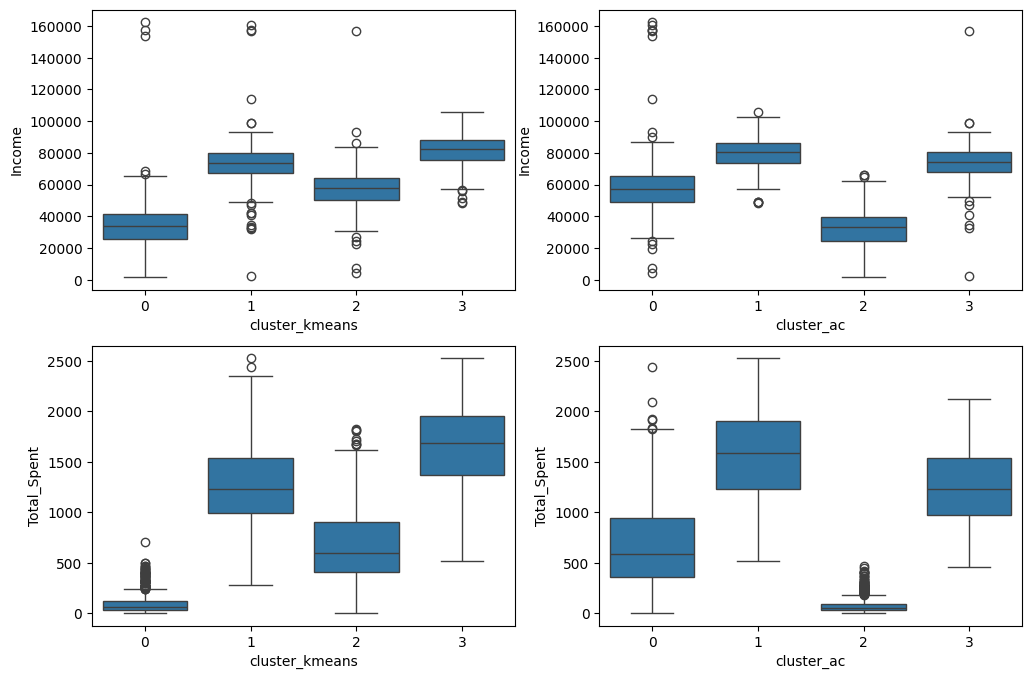

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten() 
sns.boxplot(data=df, x='cluster_kmeans', y='Income', ax=ax[0])
sns.boxplot(data=df, x='cluster_ac', y='Income', ax=ax[1])
sns.boxplot(data=df, x='cluster_kmeans', y='Total_Spent', ax=ax[2])
sns.boxplot(data=df, x='cluster_ac', y='Total_Spent', ax=ax[3])
plt.show()

We will take a look at demographic information about customers in each cluster, kids at home, teenagers at home, partner status and education. Cluster 0 in K-Means and Cluster 2 in Agglomerative have the most count with one kid at home. Cluster 2 in K-Means and Cluster 0 in Agglomerative have the most count with one teen at home. 

In [37]:
# strings for visualization purposes
df['cluster_kmeans_str'] = df['cluster_kmeans'].astype(str)
df['cluster_agglomerative_str'] = df['cluster_ac'].astype(str)
df['Education_str'] = label_encoder.inverse_transform(df['Education'])

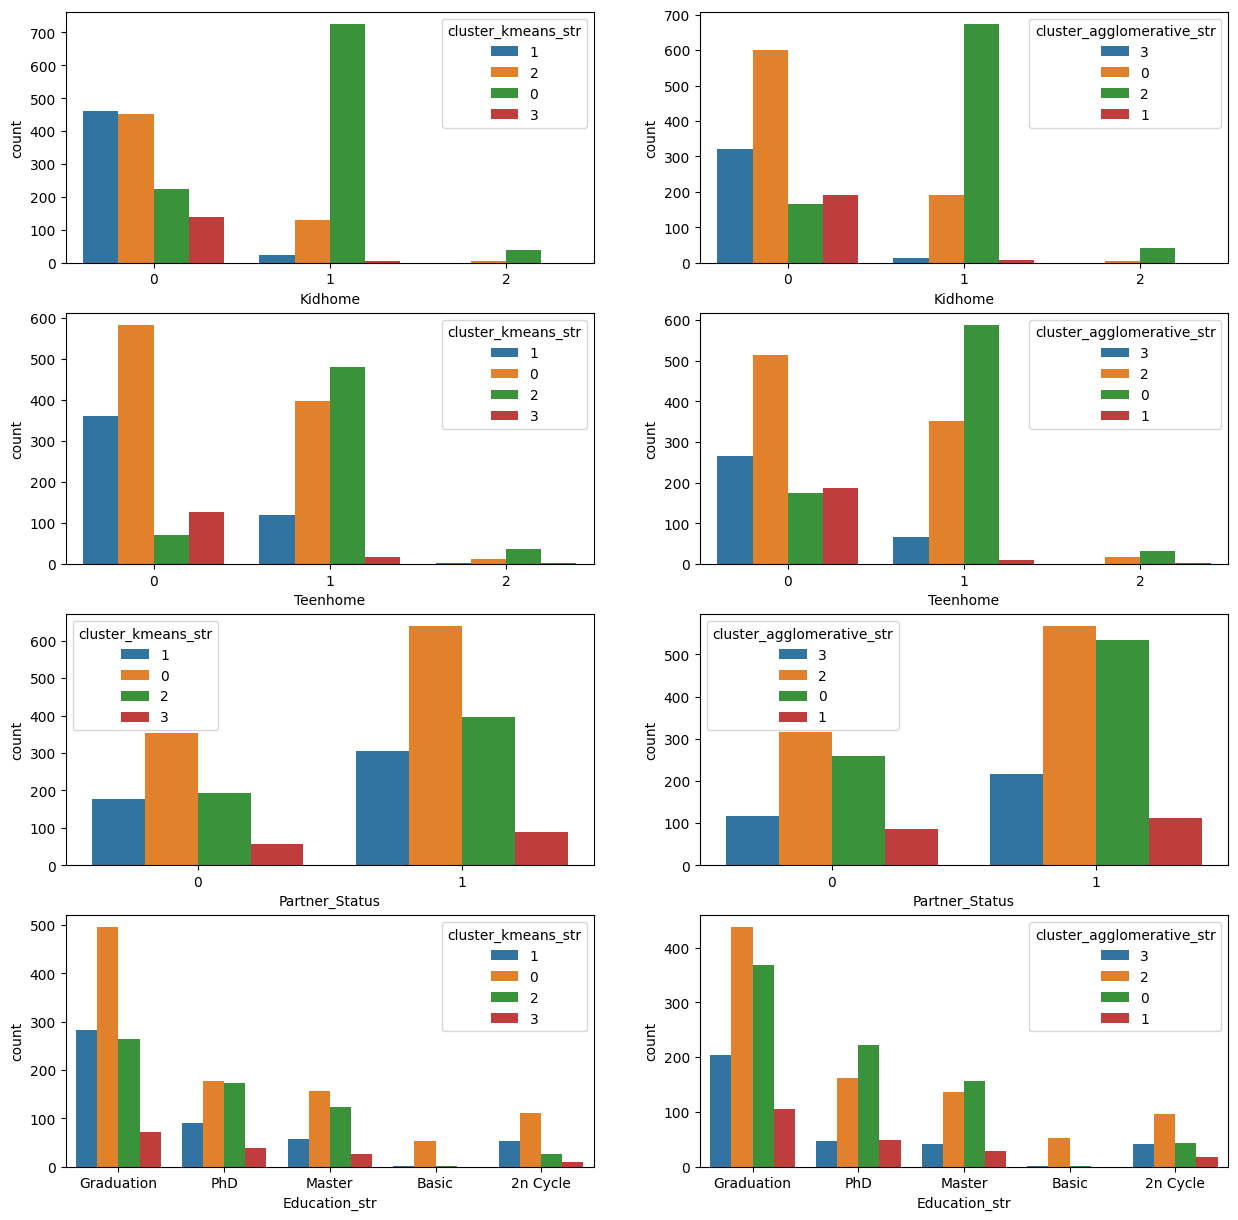

In [38]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax = ax.flatten() 
labels = [0, 1, 2, 3]
sns.countplot(data = df, x = 'Kidhome', hue = 'cluster_kmeans_str' , ax=ax[0])
sns.countplot(data = df, x = 'Kidhome', hue = 'cluster_agglomerative_str' , ax=ax[1])
sns.countplot(data = df, x = 'Teenhome', hue = 'cluster_kmeans_str', ax=ax[2])
sns.countplot(data = df, x = 'Teenhome', hue = 'cluster_agglomerative_str', ax=ax[3])
sns.countplot(data = df, x = 'Partner_Status', hue = 'cluster_kmeans_str' , ax=ax[4])
sns.countplot(data = df, x = 'Partner_Status', hue = 'cluster_agglomerative_str', ax=ax[5])
sns.countplot(data = df, x = 'Education_str', hue = 'cluster_kmeans_str' , ax=ax[6])
sns.countplot(data = df, x = 'Education_str', hue = 'cluster_agglomerative_str', ax=ax[7])
plt.show()

Let's check cluster sizes:

In [39]:
df['cluster_kmeans'].value_counts().sort_index()

cluster_kmeans
0    992
1    483
2    588
3    145
Name: count, dtype: int64

In [40]:
df['cluster_ac'].value_counts().sort_index()

cluster_ac
0    793
1    199
2    883
3    333
Name: count, dtype: int64

Cluster sizes for K-Means and Agglomerative Clustering are quite different but K-Means seems slightly more balanced as the cluster 3 in Agglomerative Clustering has only 71 members. We will continue our analysis with the K-Means model.

### K-Means Model Analysis
Now we will compare the mean values for each cluster for various features to get a better understanding of customer profiles.

First we will look at general information for the mean values of income, age, kid at home, teen at home, recency and total spent.

In [41]:
general_info = ['Income', 'Age', 'Kidhome','Teenhome','Recency', 'Total_Spent', 'cluster_kmeans']
df[general_info].groupby('cluster_kmeans').mean()

,Income,Age,Kidhome,Teenhome,Recency,Total_Spent
cluster_kmeans,,,,,,
0,34054.309476,51.687500,0.813508,0.423387,48.813508,94.983871
1,73417.426501,56.196687,0.045549,0.256729,51.142857,1273.950311
2,57282.173469,60.365646,0.241497,0.940476,48.812925,667.520408
3,81150.924138,53.372414,0.041379,0.137931,44.772414,1641.379310


Now we will take a look at information about promotions, mean values of NumDealsPurchases, Accepted Campaigns and response to offers. 

In [42]:
promotions = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'cluster_kmeans']
df[promotions].groupby('cluster_kmeans').mean()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
cluster_kmeans,,,,,,,
0,2.056452,0.001008,0.002016,0.076613,0.006048,0.000000,0.098790
1,1.559006,0.076605,0.000000,0.049689,0.022774,0.082816,0.134576
2,3.705782,0.028912,0.005102,0.059524,0.130952,0.005102,0.100340
3,1.075862,0.593103,0.172414,0.193103,0.482759,0.806897,0.751724


Next we will look at mean values of products purchased and where the products were purchased, web, catalog or store for each cluster. 

In [43]:
purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'cluster_kmeans']
df[purchases].groupby('cluster_kmeans').mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster_kmeans,,,,,,,,,
0,2.096774,0.527218,3.157258,38.762097,4.943548,23.128024,7.251008,5.129032,15.770161
1,5.296066,5.784679,8.581781,521.509317,71.521739,426.492754,102.681159,71.828157,79.917184
2,6.071429,2.872449,7.430272,427.209184,18.700680,123.141156,25.482993,19.171769,53.814626
3,5.613793,6.124138,8.089655,913.110345,52.558621,464.820690,76.468966,60.041379,74.379310


## Conclusions
Based on the tables above and visualizations we can infer various characteristics for each cluster and target the marketing campaigns accordingly. Below is a summary of the conclusions:

**K-means cluster 0:**
* Most likely to have a kid at home
* Many have teenagers at home
* Most likely to have a partner
* Relatively younger
* Low income range
* Low spender

**K-means cluster 1:**
* Very likely does not have kids or teenagers at home
* Higher income range
* Higher spending
* Highest average fruits, meat, fish, sweets and gold products purchases
* High number of in store purchases

**K-means cluster 2:**
* Most likely to have a teenager at home
* Relatively older
* Mid income range
* Highest number of Web Purchases
* Very high Wine Products purchase compared to other product categories
* Likely to respond to deals

**K-means cluster 3:**
* Most likely no kids or teenagers at home
* Very high income
* Relatively young
* Spent most on purchases
* Most likely to accept campaigns

